<a href="https://colab.research.google.com/github/CrodriguezCode/TalentoTech/blob/main/Regresion_lineal_multiple_Dataset_Student_Study_Hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando datos

In [ ]:
#este dataset lo obtuve de https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

import pandas as pd
import sklearn
import seaborn as sns

df_studyhours = pd.read_csv("Student_Performance.csv")
df_studyhours

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [ ]:
df_studyhours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours_Studied                     10000 non-null  int64 
 1   Previous_Scores                   10000 non-null  int64 
 2   Extracurricular_Activities        10000 non-null  object
 3   Sleep_Hours                       10000 non-null  int64 
 4   Sample_Question_Papers_Practiced  10000 non-null  int64 
 5   Performance_Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


#Eliminando columna object

In [ ]:
df_studyhours=df_studyhours.drop(columns=['Extracurricular_Activities'])
df_studyhours

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66
...,...,...,...,...,...
9995,1,49,4,2,23
9996,7,64,8,5,58
9997,6,83,8,5,74
9998,9,97,7,0,95


In [ ]:
df_studyhours.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


#Matriz de Correlacion

Correlation Matrix:
                                  Hours_Studied  Previous_Scores  Sleep_Hours  \
Hours_Studied                          1.000000        -0.012390     0.001245   
Previous_Scores                       -0.012390         1.000000     0.005944   
Sleep_Hours                            0.001245         0.005944     1.000000   
Sample_Question_Papers_Practiced       0.017463         0.007888     0.003990   
Performance_Index                      0.373730         0.915189     0.048106   

                                  Sample_Question_Papers_Practiced  \
Hours_Studied                                             0.017463   
Previous_Scores                                           0.007888   
Sleep_Hours                                               0.003990   
Sample_Question_Papers_Practiced                          1.000000   
Performance_Index                                         0.043268   

                                  Performance_Index  
Hours_Studied     

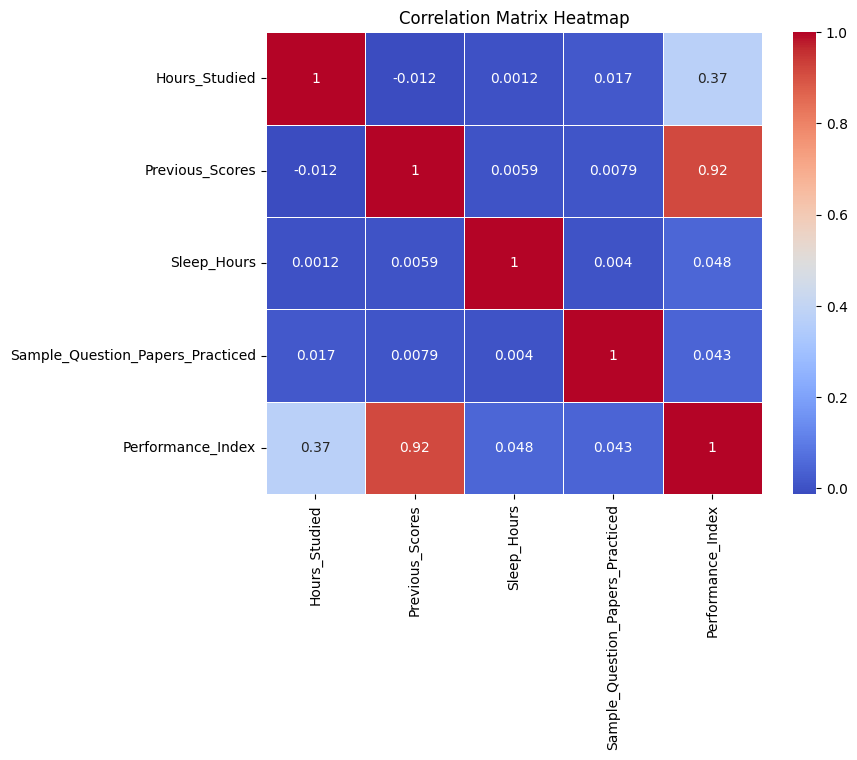

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn for heatmap plotting

# Calculate the correlation matrix, excluding non-numeric columns
# Assuming 'Study_Hours' is the numerical column you want to analyze
correlation_matrix = df_studyhours.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#sns.jointplot(x="Hours", y="Scores", data=df_studyhours)

# 2.2 Preparando los datos y realizando modelo de regresión lineal
Particionando el dataset para la creación de modelos. Esto mediante la función `train_test_split` de scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# extrayendo la información del dataset
X = df_studyhours[["Hours_Studied","Previous_Scores","Sleep_Hours","Sample_Question_Papers_Practiced"]] # Reshape to 2D array, use a list for multiple columns
y = df_studyhours["Performance_Index"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# crear el modelo
regressor = LinearRegression(fit_intercept = True)

# entrenarlo con los datos
regressor.fit(X_train, y_train)  # Now x_train is a 2D array

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

La pendiente del modelo (B) es: [2.85775009 1.01727449 0.48574882 0.19601662], el intersecto (A) es -33.7651935515802


# Metricas modelo de regresión lineal

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
y_pred = regressor.predict(X_test)
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("R^2:",r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error: 4.276032603081094
Root Mean Squared Error: 2.0678570074067246
Mean Absolute Error: 1.65618753241362
R^2: 0.9884843452866566
Mean Absolute Percentage Error: 0.03576821848783953


(array([  6.,  42., 207., 500., 684., 612., 330.,  99.,  16.,   4.]),
 array([-7.18413521, -5.66266036, -4.1411855 , -2.61971065, -1.09823579,
         0.42323906,  1.94471392,  3.46618877,  4.98766363,  6.50913849,
         8.03061334]),
 <BarContainer object of 10 artists>)

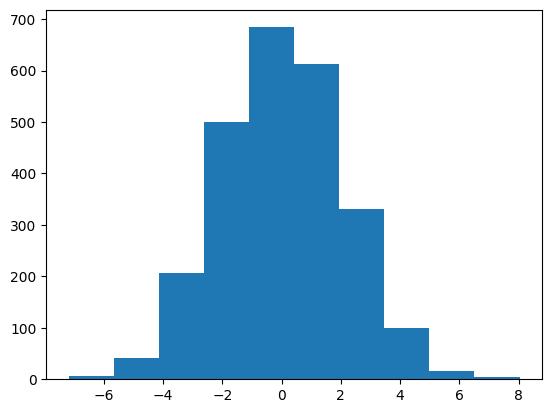

In [ ]:
import matplotlib.pyplot as plt
error = y_test-y_pred
plt.hist(error)